In [2]:
import torch
print(torch.__version__)

2.5.1+cu121


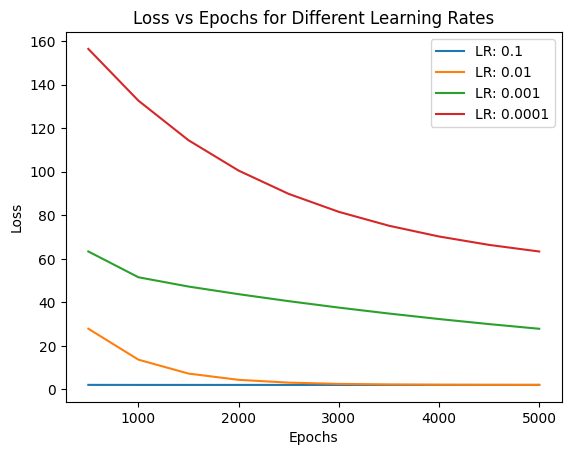

Best Learning Rate: 0.1
Final Loss: 2.0907227993011475
Best Parameters: w1 = 24.708467483520508, w2 = 28.354049682617188, b = -10.637333869934082


In [9]:
import torch
from torch.optim import SGD
import matplotlib.pyplot as plt

# Data
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

# Normalize data
t_u_normalized = t_u / 100.0

# Non-linear Model Definition
def model(t_u, w1, w2, b):
    return w2 * t_u**2 + w1 * t_u + b

# Loss Function: Mean Squared Error
def loss_fn(y_pred, y):
    return ((y_pred - y)**2).mean()

# Training Loop
def train_model(t_u, t_c, learning_rate, epochs):
    w1 = torch.tensor([0.0], requires_grad=True)
    w2 = torch.tensor([0.0], requires_grad=True)
    b = torch.tensor([0.0], requires_grad=True)

    optimizer = SGD([w1, w2, b], lr=learning_rate)
    losses = []

    for epoch in range(epochs):
        y_pred = model(t_u, w1, w2, b)
        loss = loss_fn(y_pred, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 500 == 0:
            losses.append(loss.item())

    return w1, w2, b, losses

# Train with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = 5000
results = {}

for lr in learning_rates:
    w1, w2, b, losses = train_model(t_u_normalized, t_c, lr, epochs)
    results[lr] = (w1, w2, b, losses)

# Visualize Losses
for lr, (_, _, _, losses) in results.items():
    plt.plot(range(500, epochs + 1, 500), losses, label=f"LR: {lr}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Different Learning Rates")
plt.legend()
plt.show()

# Select Best Model (smallest final loss)
best_lr = min(results, key=lambda lr: results[lr][3][-1])
best_params = results[best_lr]

print(f"Best Learning Rate: {best_lr}")
print(f"Final Loss: {results[best_lr][3][-1]}")
print(f"Best Parameters: w1 = {best_params[0].item()}, w2 = {best_params[1].item()}, b = {best_params[2].item()}")
